### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
# Import Matplotlib, Seaborn, Pandas and Numpy.
import matplotlib.pyplot as plt
from matplotlib.dates import *
import seaborn as sns
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.shape)
print(ad.dtypes)
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
print(ad['sub_icb_location_code'].isnull().sum())
print(ad['sub_icb_location_ons_code'].isnull().sum())
print(ad['sub_icb_location_name'].isnull().sum())
print(ad['icb_ons_code'].isnull().sum())
print(ad['region_ons_code'].isnull().sum())
print(ad['appointment_date'].isnull().sum())
print(ad['actual_duration'].isnull().sum())
print(ad['count_of_appointments'].isnull().sum())

0
0
0
0
0
0
0
0


In [4]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)
print(ar.dtypes)
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Determine whether there are missing values.
print(ar['icb_ons_code'].isnull().sum())
print(ar['appointment_month'].isnull().sum())
print(ar['appointment_status'].isnull().sum())
print(ar['hcp_type'].isnull().sum())
print(ar['appointment_mode'].isnull().sum())
print(ar['time_between_book_and_appointment'].isnull().sum())
print(ar['count_of_appointments'].isnull().sum())

0
0
0
0
0
0
0


In [8]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
print(nc.shape)
print(nc.dtypes)
nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
print(nc['appointment_date'].isnull().sum())
print(nc['icb_ons_code'].isnull().sum())
print(nc['sub_icb_location_name'].isnull().sum())
print(nc['service_setting'].isnull().sum())
print(nc['context_type'].isnull().sum())
print(nc['national_category'].isnull().sum())
print(nc['count_of_appointments'].isnull().sum())
print(nc['appointment_month'].isnull().sum())

0
0
0
0
0
0
0
0


In [12]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [25]:
# Determine the number of locations.
n = nc['sub_icb_location_name'].nunique()

print(f"There are {n} locations in the data set.")

There are 106 locations in the data set.


**Question 2:** What are the five locations with the highest number of records?



In [26]:
# Determine the top five locations based on record count.
nc['sub_icb_location_name'].value_counts(ascending = False).head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [14]:
# Determine the number of service settings.
ss = nc['service_setting'].nunique()
print(f"Number of service settings: {ss}.")

Number of service settings: 5.


In [15]:
# Determine the number of context types.
ct = nc['context_type'].nunique()
print(f"Number of context types: {ct}.")

Number of context types: 3.


In [16]:
# Determine the number of national categories.
ncat = nc['national_category'].nunique()
print(f"Number of national categories: {ncat}.")

Number of national categories: 18.


In [17]:
# Determine the number of appointment status.
aps = ar['appointment_status'].nunique()
print(f"Number of appointment statuses: {aps}.")

Number of appointment statuses: 3.


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [32]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [33]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [35]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [39]:
# ????Change the date format of ar['appointment_date'].???
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
nc.dtypes
# View the DateFrame.


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [40]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad_min = ad['appointment_date'].min()
ad_max = ad['appointment_date'].max()

print(f"In ad the appointments were made between {ad_min} and {ad_max}.")

In ad the appointments were made between 2021-12-01 00:00:00 and 2022-06-30 00:00:00.


In [41]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min = nc['appointment_date'].min()
nc_max = nc['appointment_date'].max()

# Use appropriate docstrings.
print(f"In nc the appointments were made between {nc_min} and {nc_max}.")

In nc the appointments were made between 2021-08-01 00:00:00 and 2022-06-30 00:00:00.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [42]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_nw = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
            (nc['appointment_date'] >'2022-01-01') & (nc['appointment_date'] <'2022-06-01')]

# View the output.
nc_nw['service_setting'].value_counts(ascending = False)

General Practice             2080
Other                        1307
Primary Care Network         1261
Extended Access Provision    1076
Unmapped                      150
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [43]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
app = nc.groupby([nc['appointment_date'].dt.year.rename('year'), \
                   nc['appointment_date'].dt.month.rename('month')]) \
                   ['count_of_appointments'].sum().reset_index() \
            .sort_values(by='count_of_appointments', ascending=False)

print(app)

    year  month  count_of_appointments
3   2021     11               30405070
2   2021     10               30303834
7   2022      3               29595038
1   2021      9               28522501
9   2022      5               27495508
10  2022      6               25828078
5   2022      1               25635474
6   2022      2               25355260
4   2021     12               25140776
8   2022      4               23913060
0   2021      8               23852171


**Question 4:** What was the total number of records per month?

In [48]:
# ???Total number of records per month.
# ???Display the total number of records per month with the value_counts() function.???
records = nc.groupby([nc['appointment_date'].dt.year.rename('year'), \
                   nc['appointment_date'].dt.month.rename('month')]) \
                   ['count_of_appointments'].count()
print(records)

year  month
2021  8        69999
      9        74922
      10       74078
      11       77652
      12       72651
2022  1        71896
      2        71769
      3        82822
      4        70012
      5        77425
      6        74168
Name: count_of_appointments, dtype: int64


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [60]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
sns.set_style('ticks',{'axes.grid' : True})

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [61]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype("string")
nc['appointment_month']

0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_month, Length: 817394, dtype: string

In [62]:
# Aggregate on monthly level and determine the sum of records per month.
# Create a new dataframe nc_ss to group the monthly appointments and service settings.
nc_ss = nc \
 .groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

Text(0.5, 1.0, 'Number of Appointments by Service Setting monthly')

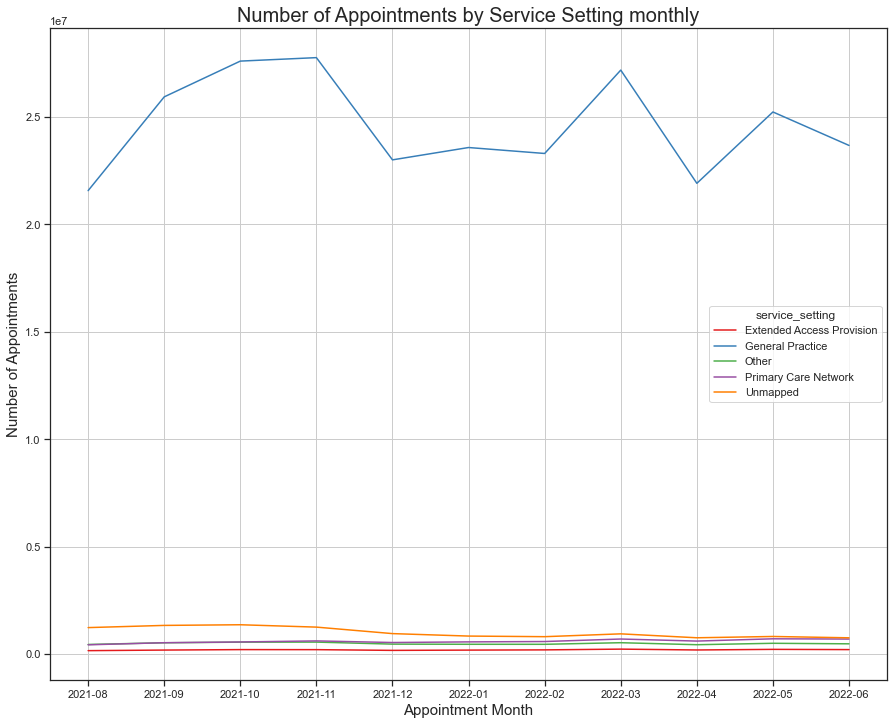

In [63]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting',
            data=nc_ss, ci=None, palette = "Set1")
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Service Setting monthly", fontsize=20)

**Context types:**

In [64]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc \
 .groupby(['appointment_month', 'context_type'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


Text(0.5, 1.0, 'Number of Appointments by Context Type monthly')

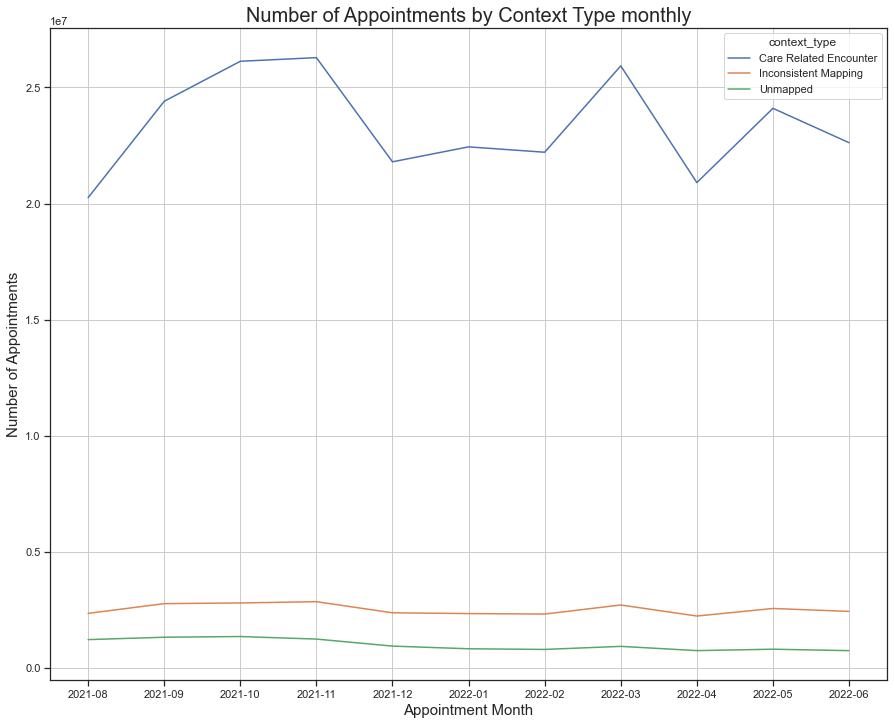

In [65]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type',
            data=nc_ct, ci=None)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Context Type monthly", fontsize=20)

**National categories:**

In [66]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc \
 .groupby(['appointment_month', 'national_category'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


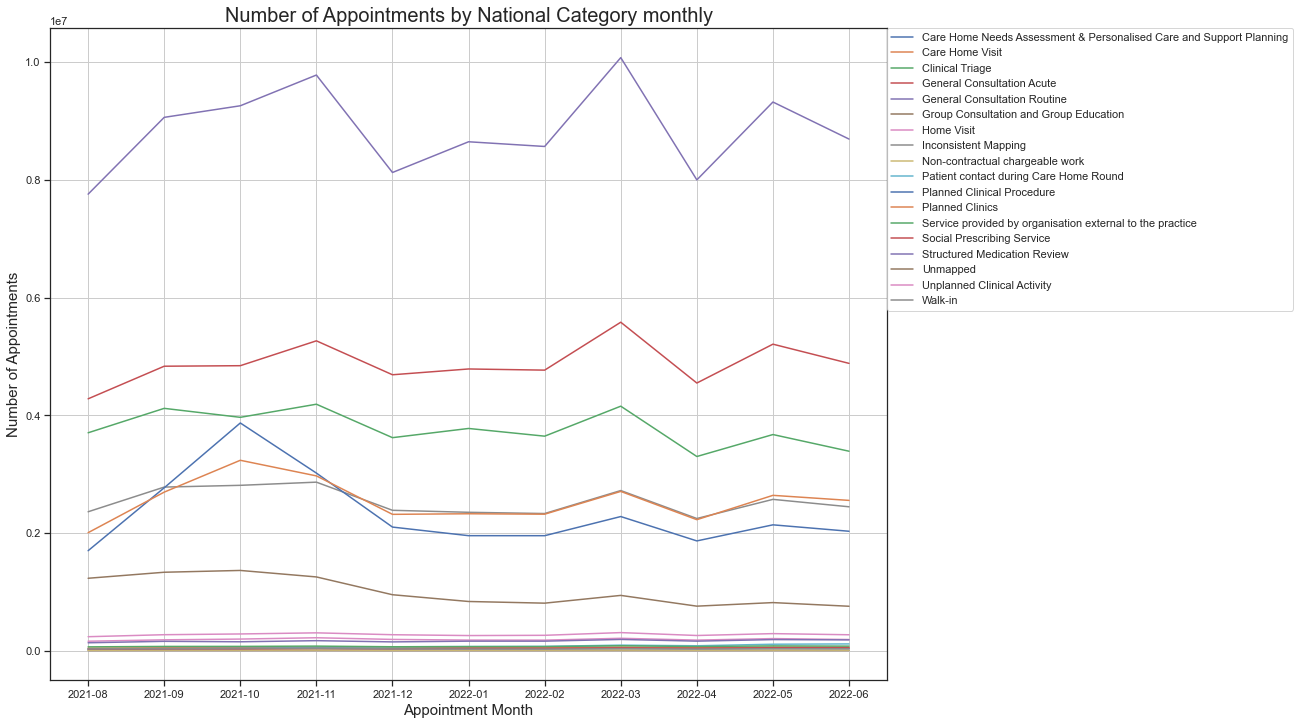

In [71]:
# Plot the appointments over the available date range, and review the national categories for months.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category',
            data=nc_nc, ci=None, palette = 'deep')
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by National Category monthly", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [78]:
# Create a separate data set that can be used in future weeks. 
nc_ss_summer = nc[nc.appointment_month == '2021-08'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# View output.
nc_ss_summer

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
150,2021-08-31,Extended Access Provision,8281
151,2021-08-31,General Practice,1125584
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789


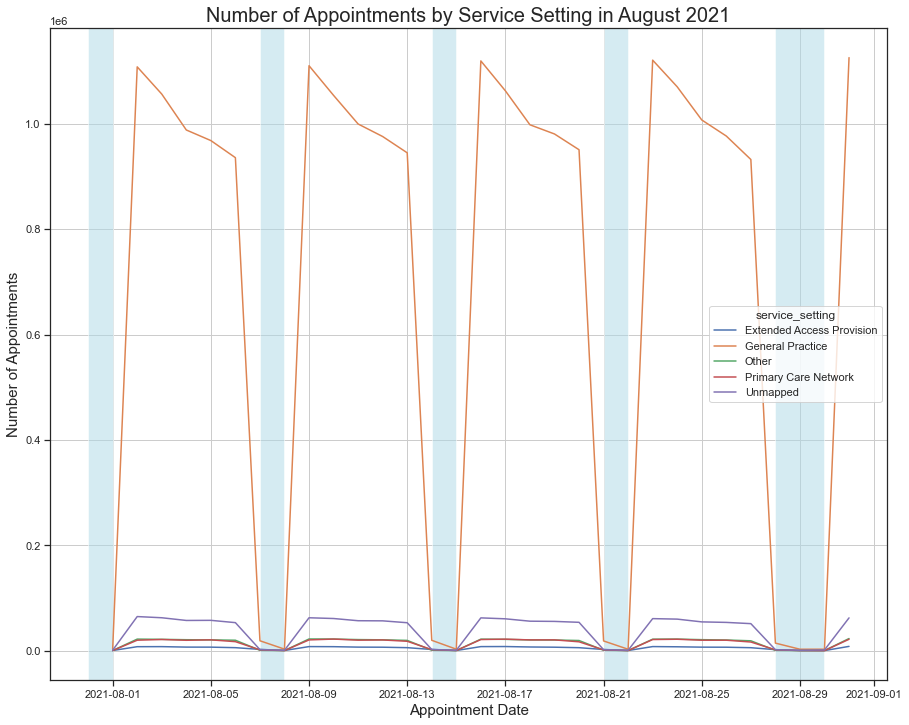

In [79]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_summer, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Service Setting in August 2021", fontsize=20)

# Highlighting the weekends and bank holidays in August 2021.
plt.axvspan('2021-07-31', '2021-08-01', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-07', '2021-08-08', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-14', '2021-08-15', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-21', '2021-08-22', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-28', '2021-08-30', facecolor='#ADD8E6', alpha=0.5)

**Autumn (October 2021):**

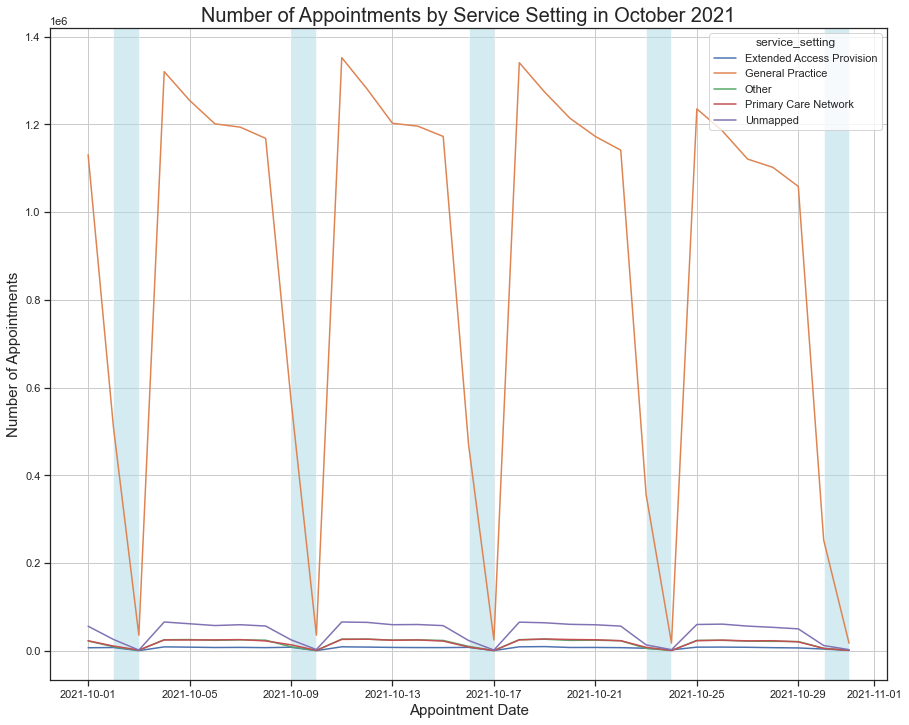

In [83]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_autumn = nc[nc.appointment_month == '2021-10'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot for df with October 2021 data.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_autumn, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Service Setting in October 2021", fontsize=20)

# Highlighting the weekends and bank holidays.
plt.axvspan('2021-10-02', '2021-10-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-09', '2021-10-10', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-16', '2021-10-17', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-23', '2021-10-24', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-30', '2021-10-31', facecolor='#ADD8E6', alpha=0.5)

**Winter (January 2022):**

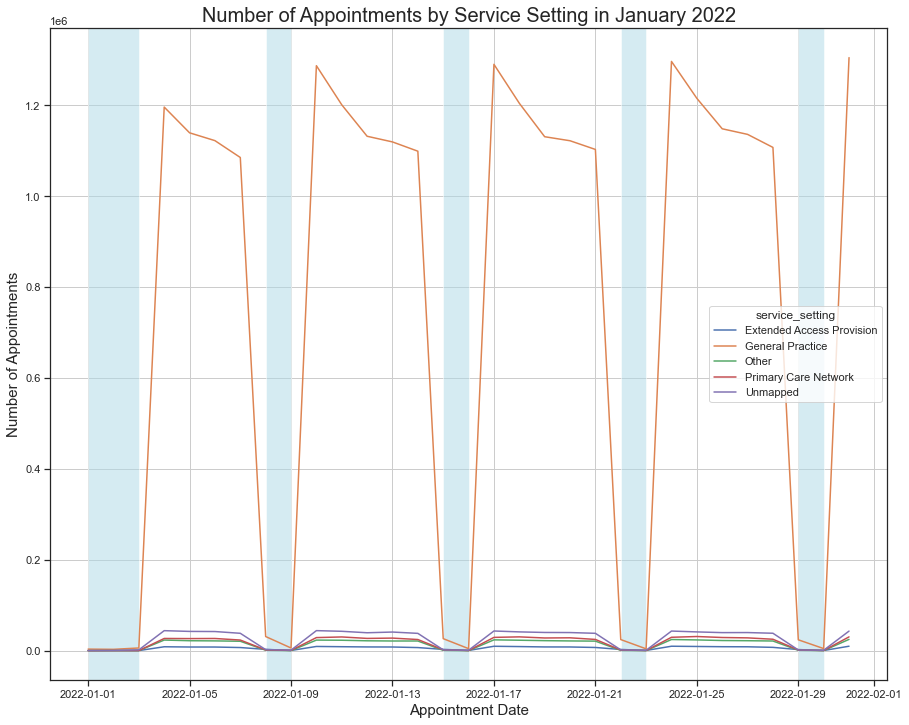

In [85]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_winter = nc[nc.appointment_month == '2022-01'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_winter, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Service Setting in January 2022", fontsize=20)

# Highlighting the weekends and bank holidays.
plt.axvspan('2022-01-01', '2022-01-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-08', '2022-01-09', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-15', '2022-01-16', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-22', '2022-01-23', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-29', '2022-01-30', facecolor='#ADD8E6', alpha=0.5)

**Spring (April 2022):**

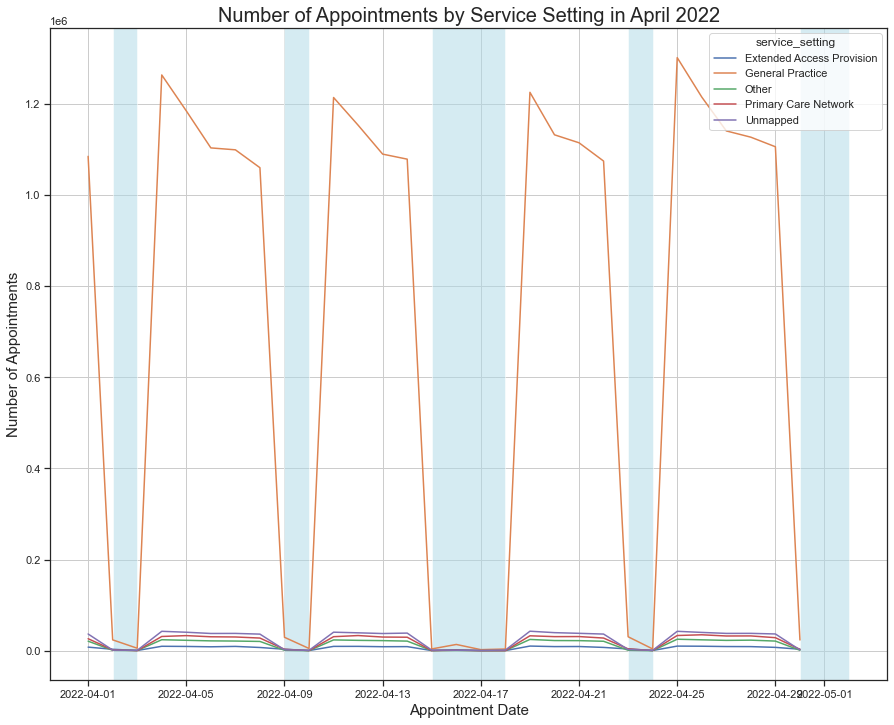

In [87]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_spring = nc[nc.appointment_month == '2022-04'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_spring, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments by Service Setting in April 2022", fontsize=20)

# Highlighting the weekends and bank holidays.
plt.axvspan('2022-04-02', '2022-04-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-09', '2022-04-10', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-15', '2022-04-18', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-23', '2022-04-24', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-30', '2022-05-02', facecolor='#ADD8E6', alpha=0.5)

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [88]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [90]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [91]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [93]:
# ???Explore the data set.???
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [95]:
# Would it be useful to only look at retweeted and favourite tweet messages?
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())
# Explain your answer.


0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [97]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [105]:
# Loop through the messages, and create a list of values containing the # symbol.
tags=[]

# Run a loop to look at the hashtags (#) used in tweets.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# View the results.            
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [106]:
# Create series from a list.
tags = pd.Series(tags).value_counts()
# View the first 30 hashtags from the series.
tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [115]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags2).reset_index()

# Rename the columns.
data.columns=['word','count']
print(data.shape)
data.head()

(1754, 2)


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [118]:
# Fix the count datatype.
print(data.dtypes)
# View the result.
data

word     object
count     int64
dtype: object


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [124]:
# Display records where the count is larger than 10.
above_10 = data[data['count'] > 10]
above_10

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


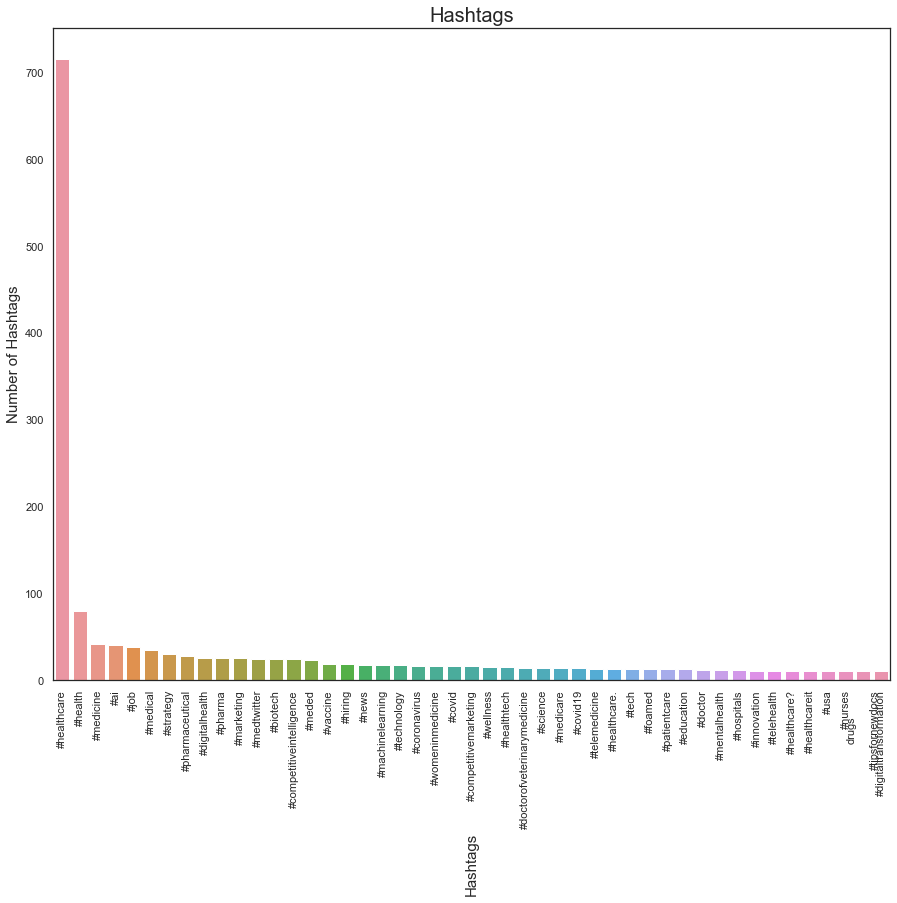

In [126]:
# Create a Seaborn barplot indicating records with a count >10 records.
fig, ax1 = plt.subplots(figsize=(15,12))
graph = sns.barplot(ax=ax1,x='word', y='count' , data=above_10)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.set_xlabel('Hashtags', fontsize=15, rotation=90)
graph.set_ylabel('Number of Hashtags', fontsize=15)
graph.set_title("Hashtags", fontsize=20)
i=0

In [ ]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [127]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [130]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [140]:
# Filter the data set to only look at data from 2021-08 onwards.
ar = ar[ar['appointment_month']>='2021-08']
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [141]:
# Create an aggregated data set to review the different features.
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', \
            'time_between_book_and_appointment', 'count_of_appointments']]

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [163]:
# Determine the total number of appointments per month.
ar_agg = ar_agg \
 .groupby(['appointment_month'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_agg['utilisation'] = (ar_agg['count_of_appointments']/30).round(1)

# View the DataFrame.
ar_agg

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


Text(0.5, 1.0, 'Number of Appointments Monthly')

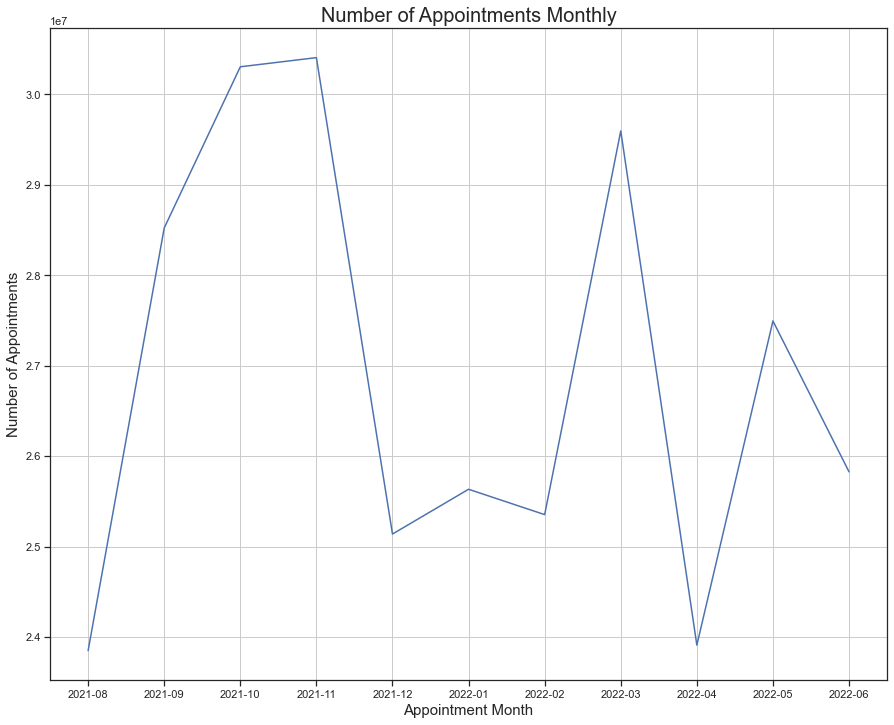

In [169]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg['appointment_month'] = ar_agg['appointment_month'].astype("string")

# Create a lineplot with Seaborn.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments', fontsize=15)
b.set_title("Number of Appointments Monthly", fontsize=20)

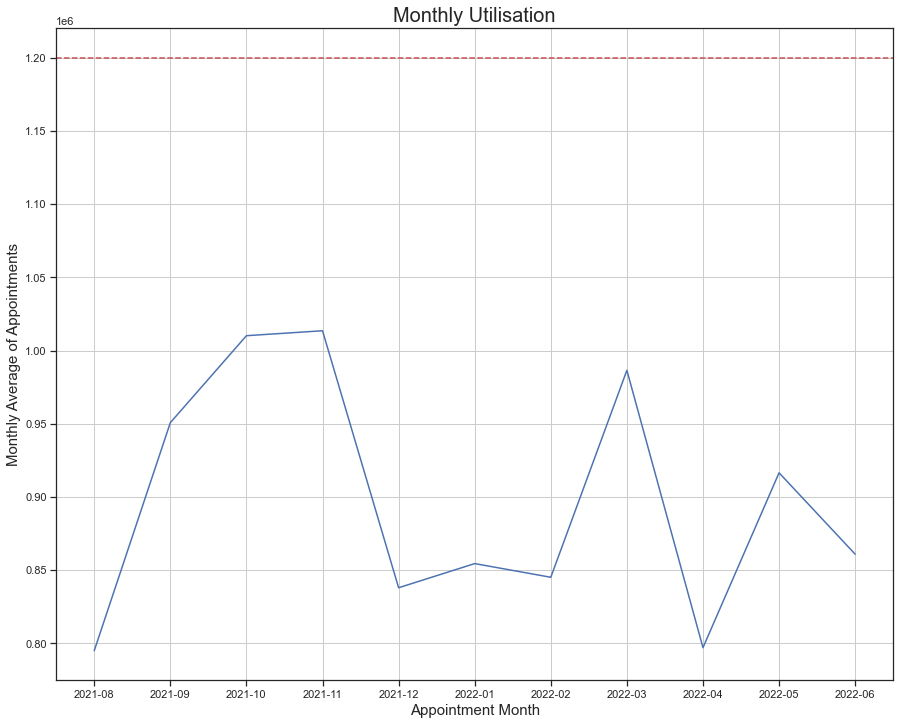

In [170]:
# Plot monthly capacity utilisation.
b=sns.lineplot(x='appointment_month', y='utilisation', data=ar_agg)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments', fontsize=15)
b.set_title("Monthly Utilisation", fontsize=20)
plt.axhline(y=1200000, color='r', linestyle='--')
# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

Text(0.5, 1.0, 'Monthly Number of Appointments by HCP Type')

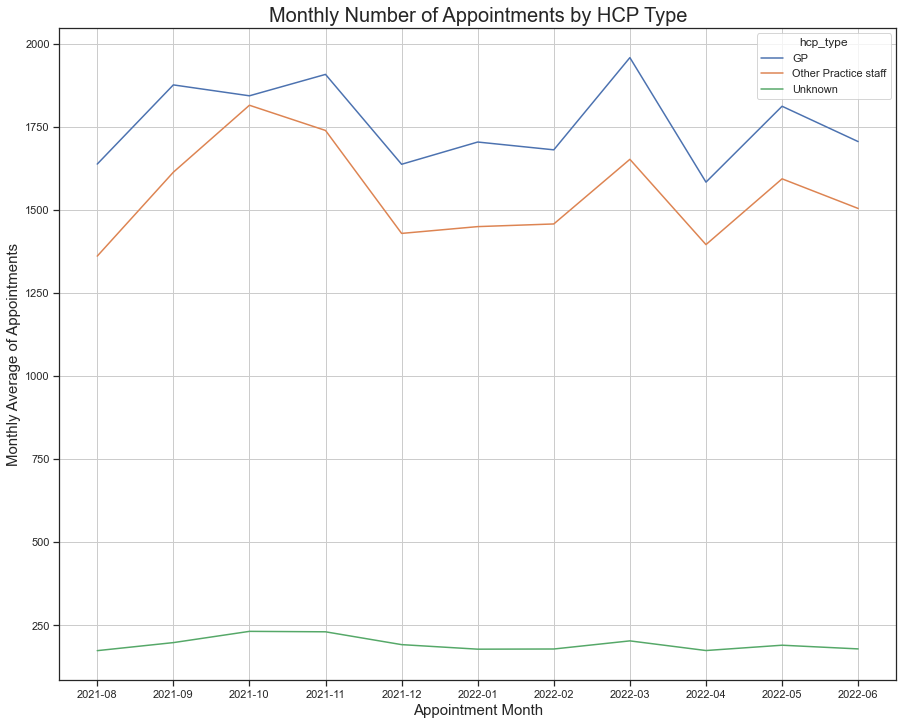

In [177]:
# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar, ci=None)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments', fontsize=15)
b.set_title("Monthly Number of Appointments by HCP Type", fontsize=20)


**Question 3:** Are there significant changes in whether or not visits are attended?

Text(0.5, 1.0, 'Monthly Number of Appointments by Status')

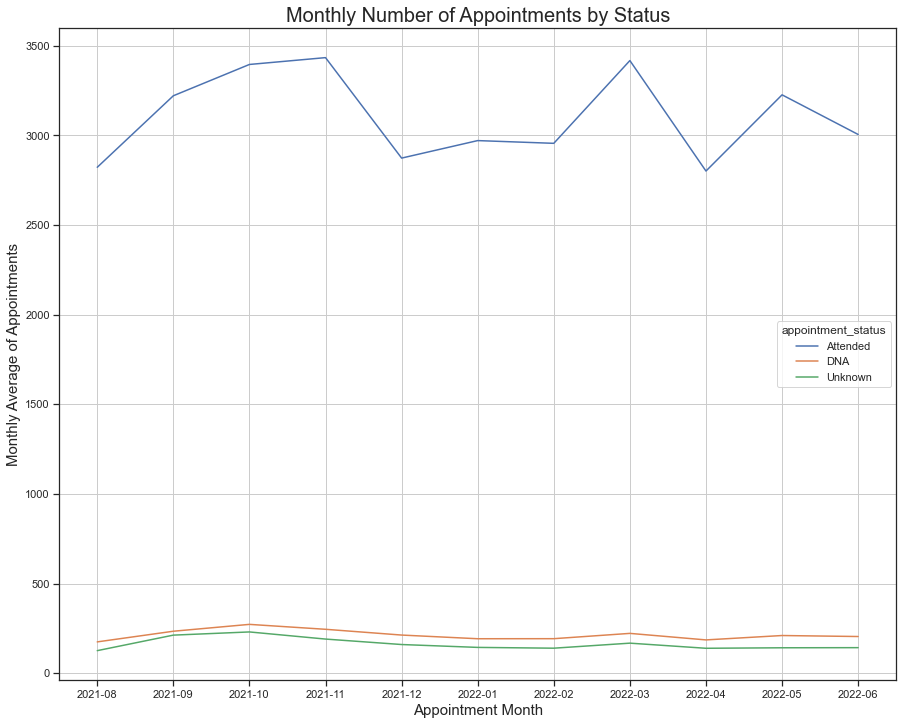

In [178]:
# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar, ci=None)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments', fontsize=15)
b.set_title("Monthly Number of Appointments by Status", fontsize=20)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

Text(0.5, 1.0, 'Monthly Number of Appointments by Mode')

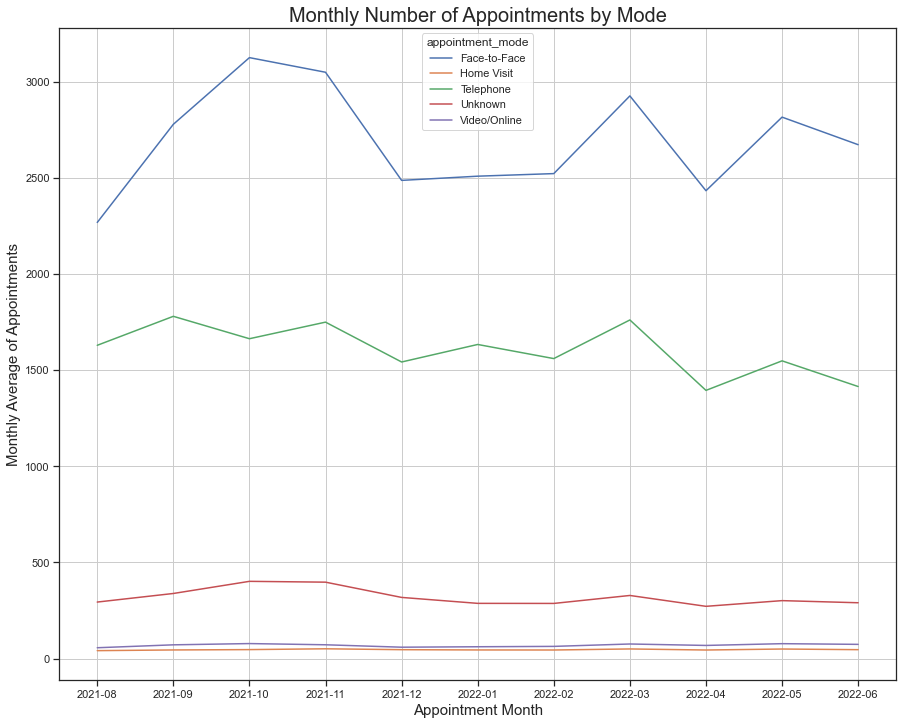

In [179]:
# Create a line plot to answer the question.
# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar, ci=None)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments', fontsize=15)
b.set_title("Monthly Number of Appointments by Mode", fontsize=20)

**Question 5:** Are there any trends in time between booking an appointment?

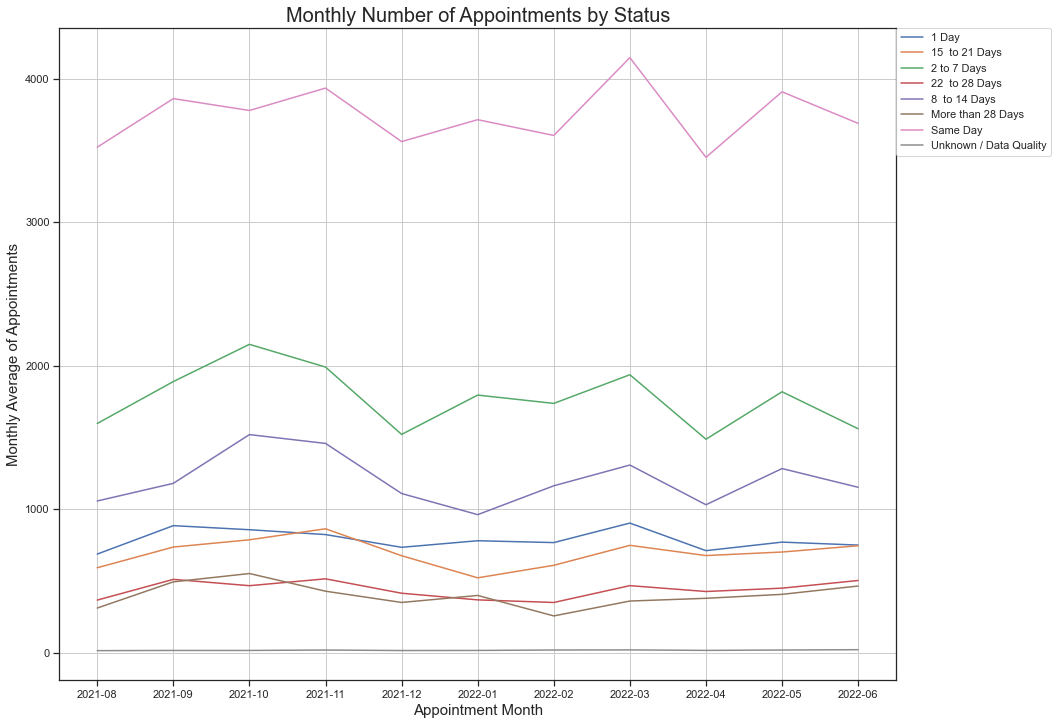

In [181]:
# Create a line plot to answer the question.
# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar, ci=None)
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments', fontsize=15)
b.set_title("Monthly Number of Appointments by Status", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

**Question 6:** How do the spread of service settings compare?

In [196]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


In [195]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_new = nc[['count_of_appointments', 'appointment_month', 'service_setting']]
# View the DataFrame.
nc_new.head()

,count_of_appointments,appointment_month,service_setting
0,3,2021-08,Primary Care Network
1,7,2021-08,Other
2,79,2021-08,General Practice
3,725,2021-08,General Practice
4,2,2021-08,General Practice


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

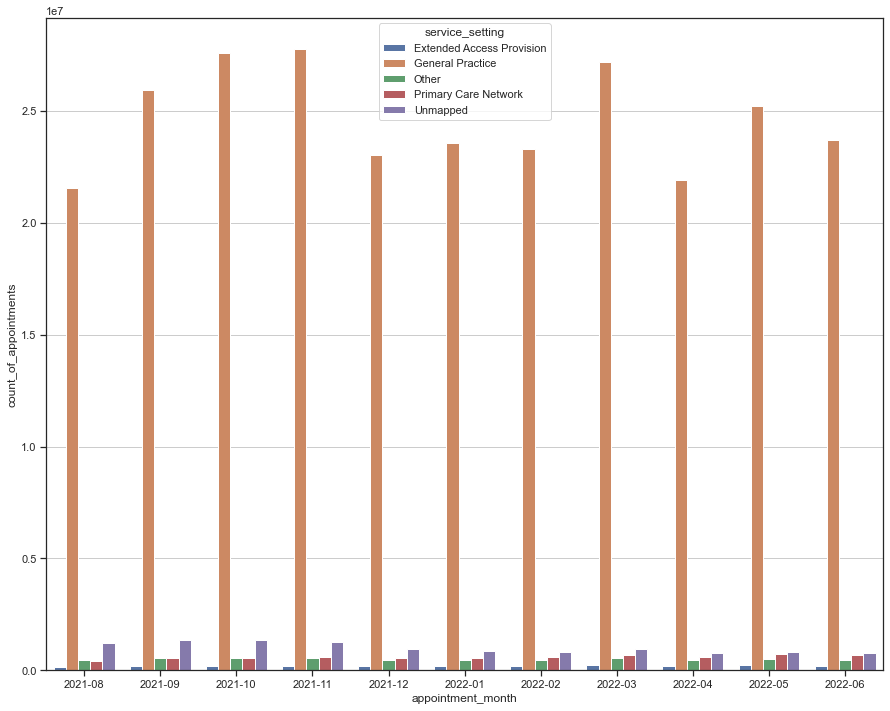

In [201]:
# Create a boxplot to investigate spread of service settings.
sns.barplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='service_setting', dodge=True)

In [ ]:
# Create a boxplot to investigate the service settings without GP.

sns.barplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.